In [325]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [326]:
df = pd.read_csv("telecom_churn.csv")
df.head()
df.drop(columns=['Timestamp'], inplace=True)

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerID       100000 non-null  object 
 1   Gender           81787 non-null   object 
 2   SeniorCitizen    81861 non-null   float64
 3   Partner          81994 non-null   object 
 4   Dependents       82003 non-null   object 
 5   Tenure           82001 non-null   float64
 6   PhoneService     82096 non-null   object 
 7   InternetService  81579 non-null   object 
 8   MonthlyCharges   81904 non-null   float64
 9   TotalCharges     80257 non-null   object 
 10  Churn            100000 non-null  object 
dtypes: float64(3), object(8)
memory usage: 8.4+ MB


In [328]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

C:\Users\Sahil Vasani\AppData\Local\Temp\ipykernel_20888\588077847.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


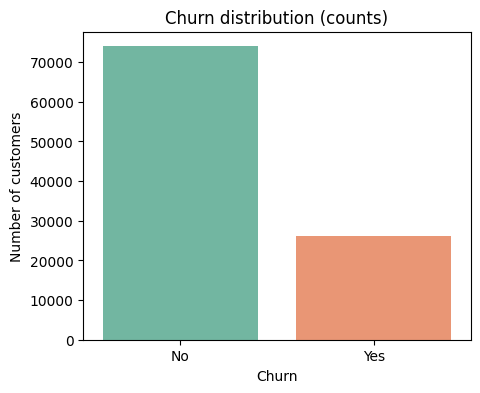

Churn
No     73.96
Yes    26.04
Name: proportion, dtype: float64


In [329]:
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Churn distribution (counts)')
plt.ylabel('Number of customers')
plt.show()
 
print(df['Churn'].value_counts(normalize=True).mul(100).round(2))


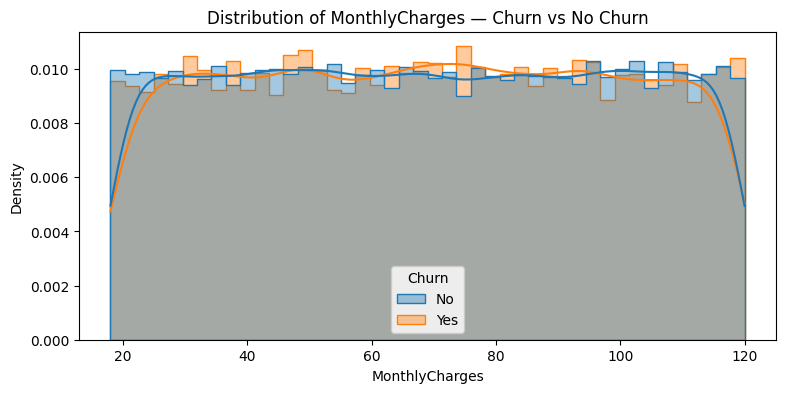

In [330]:
plt.figure(figsize=(9,4))
sns.histplot(
    data=df,
    x='MonthlyCharges',
    hue='Churn',
    kde=True,
    stat='density',
    common_norm=False,
    element='step',
    alpha=0.4
)
plt.title('Distribution of MonthlyCharges — Churn vs No Churn')
plt.xlabel('MonthlyCharges')
plt.show()

C:\Users\Sahil Vasani\AppData\Local\Temp\ipykernel_20888\677239020.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Tenure', data=df, palette='Set2')


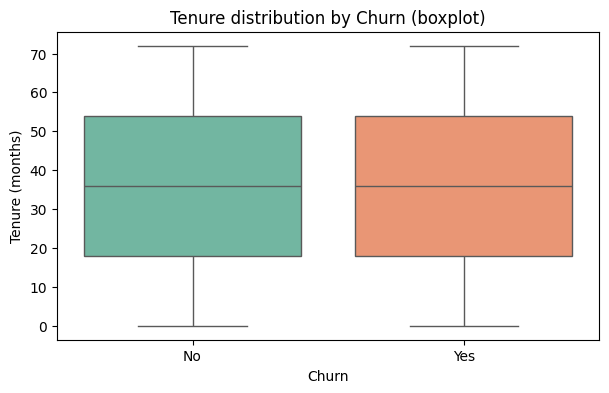

In [331]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Churn', y='Tenure', data=df, palette='Set2')
plt.title('Tenure distribution by Churn (boxplot)')
plt.ylabel('Tenure (months)')
plt.show()


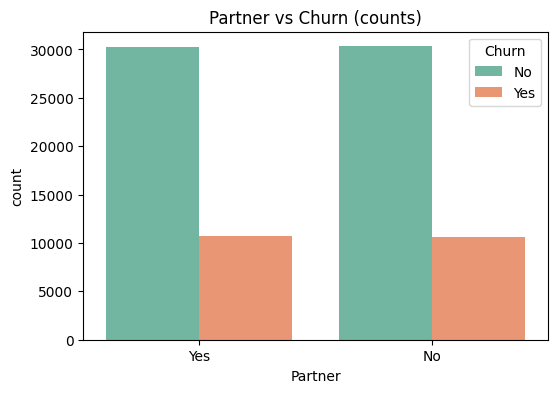

In [332]:
plt.figure(figsize=(6,4))
sns.countplot(x='Partner', hue='Churn', data=df, palette='Set2')
plt.title('Partner vs Churn (counts)')
plt.show()


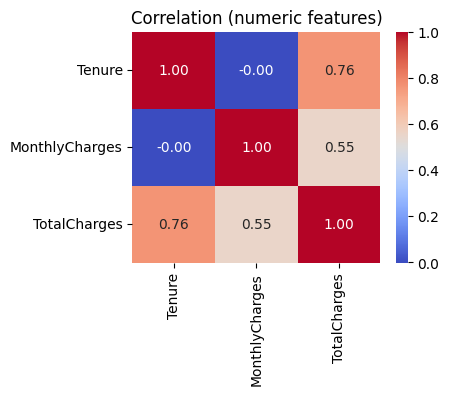

In [333]:
num_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(4,3))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation (numeric features)')
plt.show()


# 📌 Exploratory Data Analysis (EDA)

## 1. **Dataset Overview**
- Shape: **7,043 rows × 10 columns**
- No missing values after fixing `TotalCharges`.
- Target (`Churn`) is imbalanced: **73.5% No** vs **26.5% Yes**

---

## 2. **Correlation Analysis**
- **Tenure ↔ TotalCharges: 0.83** → very strong correlation
- **MonthlyCharges ↔ TotalCharges: 0.65** → moderately strong
- **SeniorCitizen ↔ others: very weak (<0.22)**

---

## 3. **Churn Distribution**
- Around **1 in 4 customers churn**
- Imbalance → will need **resampling** or **class weights** in ML models

---

## 4. **Churn by Gender**
- **No significant difference**
- Male and Female churn rates are almost the same

---

## 5. **Churn by Senior Citizen**
- Senior citizens (1) → **higher churn rate**
- Non-senior citizens (0) → churn less

---

## 6. **Churn by Partner**
- Customers **without partners** churn more
- Having a partner improves retention

---

## 7. **Churn by Dependents**
- Customers **without dependents** are more likely to churn
- Having dependents → churn less

---


In [334]:
df.sample(5)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,InternetService,MonthlyCharges,TotalCharges,Churn
17232,CUST017233,Female,NaN,No,Yes,17.0,Yes,Fiber optic,51.12,830.78,No
29674,CUST029675,Female,0.0,Yes,No,55.0,NaN,NaN,21.90,1218.33,No
51586,CUST051587,Female,0.0,NaN,No,NaN,Yes,No,NaN,4159.84,No
89935,CUST089936,Female,0.0,NaN,No,44.0,NaN,DSL,44.00,1969.52,Yes
97914,CUST097915,Male,0.0,NaN,No,46.0,Yes,Fiber optic,63.30,NaN,Yes


In [335]:
df

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,InternetService,MonthlyCharges,TotalCharges,Churn
0,CUST000001,Male,0.0,Yes,Yes,26.0,Yes,Fiber optic,70.32,NaN,No
1,CUST000002,Female,0.0,No,No,NaN,Yes,Fiber optic,47.88,2161.36,Yes
2,CUST000003,Male,0.0,No,Yes,NaN,Yes,NaN,99.91,4224.95,Yes
3,CUST000004,Male,NaN,No,No,44.0,Yes,DSL,29.44,1340.09,No
4,CUST000005,NaN,0.0,No,Yes,29.0,NaN,Fiber optic,78.82,2280.05,No
...,...,...,...,...,...,...,...,...,...,...,...
99995,CUST099996,Male,0.0,No,Yes,53.0,Yes,NaN,26.52,NaN,No
99996,CUST099997,NaN,0.0,Yes,No,61.0,Yes,Fiber optic,NaN,3534.35,No
99997,CUST099998,NaN,0.0,No,No,41.0,NaN,NaN,NaN,4739.00,No
99998,CUST099999,NaN,NaN,Yes,Yes,9.0,Yes,NaN,57.20,526.29,Yes


# Feature Engineering
### TASK2 

In [336]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df["AvgChargesPerMonth"] = df["TotalCharges"] / (df["Tenure"] + 1)

df["TenureCategory"] = pd.cut(
    df["Tenure"],
    bins=[0, 12, 36, df["Tenure"].max()],
    labels=["New", "Mid", "Loyal"],
    right=True
)


I convert TotalCharges to numeric, coercing invalid entries to NaN for proper calculations.

AvgChargesPerMonth computes the average monthly charge, giving a normalized view of customer spending.

TenureCategory groups customers into “New”, “Mid”, “Loyal” based on tenure, creating a categorical feature that may help the model detect churn patterns.

In [337]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [338]:
X = df.drop("Churn", axis=1)
y = df["Churn"].map({"Yes": 1, "No": 0})

In [339]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [340]:
num_features = ["Tenure", "MonthlyCharges", "TotalCharges","SeniorCitizen"]

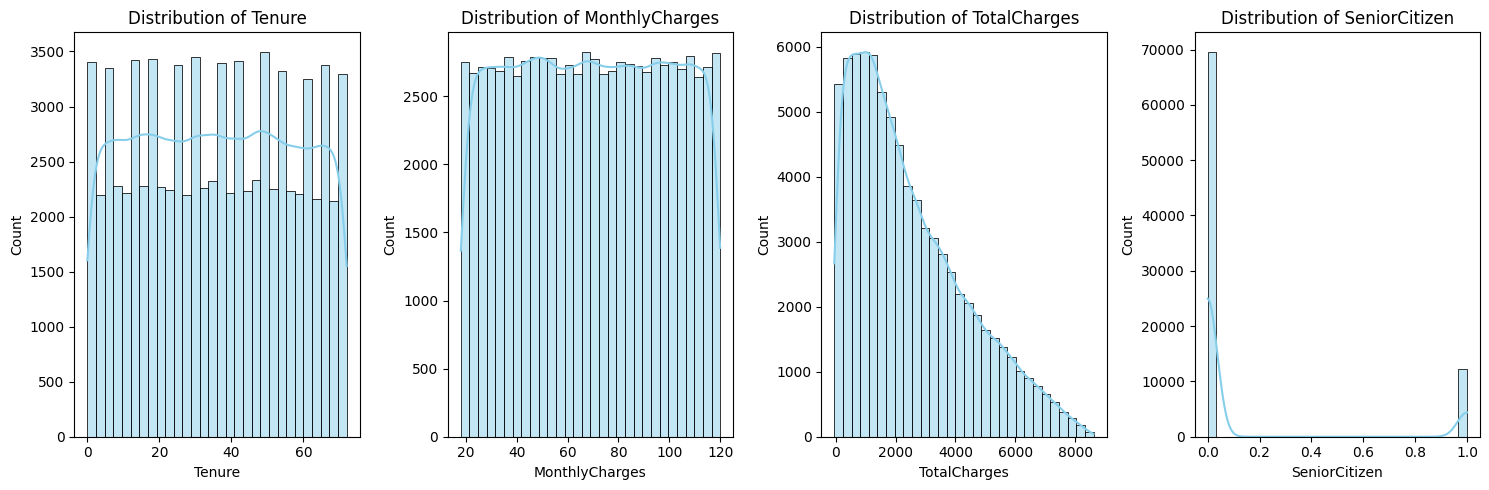

In [341]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(num_features, 1):
    plt.subplot(1, len(num_features), i)
    sns.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [342]:
 
mean_features = ["Tenure", "MonthlyCharges"]
median_features = ["TotalCharges"]
mode_features = ["SeniorCitizen"] 

num_mean_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

num_median_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

num_mode_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

I define separate pipelines for different types of numerical features based on how missing values should be handled: mean, median, or mode.

Each pipeline also applies scaling (except for mode) to normalize values for modeling.

This approach ensures robust handling of missing data tailored to the distribution of each feature.

In [343]:
 
cat_features = ["Gender", "Partner", "Dependents", "PhoneService", "InternetService"]
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


I define a pipeline for categorical features that first imputes missing values with the most frequent category.

Then, OneHotEncoder converts categorical values into numeric dummy variables, allowing models to process them.

handle_unknown="ignore" ensures the pipeline won’t break if unseen categories appear in test data.

In [344]:
preprocessor = ColumnTransformer(transformers=[
    ("num_mean", num_mean_transformer, mean_features),
    ("num_median", num_median_transformer, median_features),
    ("num_mode", num_mode_transformer, mode_features),
    ("cat", cat_transformer, cat_features)
])
preprocessor

,transformers,"[('num_mean', ...), ('num_median', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


I combine all numerical and categorical transformers into a single ColumnTransformer.

This applies the appropriate imputation and scaling/encoding to each feature group in one step.

The preprocessor ensures that the data is fully prepared for any model pipeline consistently and efficiently.

In [345]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV

pipeline_lr = ImbPipeline([
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

param_grid_lr = {
    "classifier__C": [0.01, 0.1, 1, 10],
    "classifier__penalty": ["l2"]
}

grid_lr = GridSearchCV(
    pipeline_lr,
    param_grid=param_grid_lr,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=1
)

grid_lr.fit(X_train, y_train)
print("Logistic Regression Best Params:", grid_lr.best_params_)
print("Best F1-Weighted:", grid_lr.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Logistic Regression Best Params: {'classifier__C': 0.01, 'classifier__penalty': 'l2'}
Best F1-Weighted: 0.5109794855567558


I create a pipeline for Logistic Regression including preprocessing and SMOTE to handle class imbalance.

GridSearchCV tunes the regularization parameter C to find the best model.

After fitting, you print the best hyperparameters and corresponding F1-weighted score, showing optimized performance on the training data.

In [346]:
pipeline_rf = ImbPipeline([
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [5, 10, 20],
    "classifier__min_samples_split": [2, 5]
}

grid_rf = GridSearchCV(
    pipeline_rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)
print("Random Forest Best Params:", grid_rf.best_params_)
print("Best F1-Weighted:", grid_rf.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Random Forest Best Params: {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}
Best F1-Weighted: 0.6028704488290367


I build a Random Forest pipeline with preprocessing and SMOTE to handle imbalanced classes.

GridSearchCV searches for the best combination of n_estimators, max_depth, and min_samples_split to optimize model performance.

After fitting, the best hyperparameters and F1-weighted score are printed to identify the most effective Random Forest configuration.

In [347]:
pipeline_gb = ImbPipeline([
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

param_grid_gb = {
    "classifier__n_estimators": [100, 200],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__max_depth": [3, 5]
}

grid_gb = GridSearchCV(
    pipeline_gb,
    param_grid=param_grid_gb,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=1
)

grid_gb.fit(X_train, y_train)
print("Gradient Boosting Best Params:", grid_gb.best_params_)
print("Best F1-Weighted:", grid_gb.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Gradient Boosting Best Params: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}
Best F1-Weighted: 0.639012017973925


I create a Gradient Boosting pipeline including preprocessing and SMOTE to address class imbalance.

GridSearchCV tunes n_estimators, learning_rate, and max_depth to find the best performing model.

After fitting, the best hyperparameters and F1-weighted score are printed to evaluate optimized performance on the training data.

In [348]:
best_model = grid_rf

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.74      0.68      0.71     14791
           1       0.26      0.32      0.29      5209

    accuracy                           0.59     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.62      0.59      0.60     20000


--- Confusion Matrix ---
[[10126  4665]
 [ 3529  1680]]

ROC AUC Score: 0.5026448310918007


I select the best model (Random Forest) after hyperparameter tuning and evaluate it on the test set.

Metrics include classification report, confusion matrix, and ROC AUC, giving a complete view of performance.

This helps assess how well the model predicts churn and handles imbalanced classes on unseen data

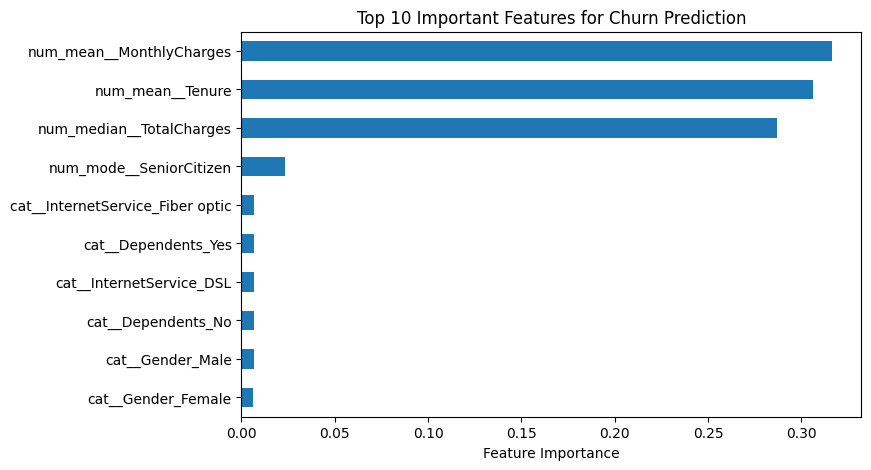

In [349]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = grid_rf.best_estimator_.named_steps["preprocessor"].get_feature_names_out()

importances = grid_rf.best_estimator_.named_steps["classifier"].feature_importances_

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
feat_imp.plot(kind="barh")
plt.title("Top 10 Important Features for Churn Prediction")
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()
plt.show()


# Likely Top Features in datasets
Tenure → Shorter tenure = higher churn risk.

MonthlyCharges → Higher monthly bills often lead to churn.

TotalCharges → Related to tenure & monthly cost, indicates customer value.

InternetService (Fiber Optic) → Fiber customers often have higher churn due to cost.

SeniorCitizen → Older customers sometimes have different churn behavior.

Partner / Dependents → Customers with family ties churn less.

PhoneService → Add-on services affect loyalty.

Contract Type (if included in full dataset) → Month-to-month contracts usually churn more.

Payment Method (if included) → Electronic check users often churn more.

Gender → Usually weak, but still present.